# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import torch
import time
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print('Call me', brain_name)

Call me ReacherBrain


### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Train the Agent with DDPG

In [5]:
from ddpg_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)

In [6]:
def ddpg(agent, n_episodes=2000, max_t=1000, train=True):
    # Initialize list of last 100 scores
    scores_window = deque(maxlen=100)
    # Initialize list of scores from each episode
    scores = []
    for i_episode in range(1, n_episodes+1):
        # Reset the environment and agent
        env_info = env.reset(train_mode=True)[brain_name]
        agent.reset()       
        # Get the current state
        state = env_info.vector_observations[0]
        # Initialize score
        score = 0
        # Iterate over timesteps per episode
        for t in range(max_t):
            # Select an action
            action = agent.act(state)
            # Get environment info
            env_info = env.step(action)[brain_name]
            # Get next state
            next_state = env_info.vector_observations[0]
            # Get reward
            reward = env_info.rewards[0]
            # Get done info
            done = env_info.local_done[0]
            # Use data to train the agent if train_mode = True
            if train: 
                agent.step(state, action, reward, next_state, done)
            # Update the score
            score += reward
            # Go to the next state
            state = next_state
            if done:
                break 
        # Update list of last 100 score
        scores_window.append(score)
        # Save also to scores list of that episode
        scores.append(score)
        # Print the performance
        print('\rEpisode {}\tAverage Score: {:.3f} \tScore: {:.3f}'.format(i_episode, np.mean(scores_window), score), end="")
        if i_episode % 25 == 0:
            print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=30.0 and train:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.cc')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.cc')
            break
    return scores

Episode 25	Average Score: 1.095 	Score: 0.100
Episode 50	Average Score: 1.512 	Score: 3.880
Episode 75	Average Score: 2.045 	Score: 2.550
Episode 100	Average Score: 2.369 	Score: 2.640
Episode 125	Average Score: 3.481 	Score: 6.7200
Episode 150	Average Score: 5.127 	Score: 14.030
Episode 175	Average Score: 7.248 	Score: 15.950
Episode 200	Average Score: 9.712 	Score: 19.400
Episode 225	Average Score: 11.839 	Score: 17.150
Episode 250	Average Score: 14.217 	Score: 26.980
Episode 275	Average Score: 16.768 	Score: 20.730
Episode 300	Average Score: 19.248 	Score: 23.210
Episode 325	Average Score: 21.664 	Score: 17.470
Episode 350	Average Score: 22.689 	Score: 32.690
Episode 375	Average Score: 23.552 	Score: 21.950
Episode 400	Average Score: 24.105 	Score: 37.290
Episode 425	Average Score: 24.456 	Score: 26.800
Episode 450	Average Score: 26.390 	Score: 34.600
Episode 475	Average Score: 27.398 	Score: 33.160
Episode 500	Average Score: 27.755 	Score: 15.590
Episode 525	Average Score: 28.852 	

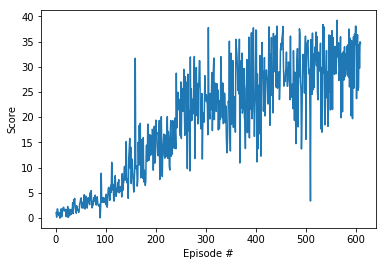

In [7]:
from ddpg_agent import Agent

# Train the agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)
scores = ddpg(agent)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [22]:
env.close()